In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import spearmanr

In [7]:
train= pd.read_csv("dataset/train.csv")
test= pd.read_csv("dataset/test.csv")

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#from sklearn.preprocessing import LabelEncoder

#for i in range(train.shape[1]):
#    if train.iloc[:,i].dtypes == object:
#        lbl = LabelEncoder()
#      lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
#        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
#        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(train['SaleCondition'])
train['SaleCondition'] = lbl.transform(train['SaleCondition'])

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,4,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,4,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,4,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,0,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,4,250000


In [12]:
train_ID = train['Id']
test_ID = test['Id']

In [13]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [14]:
train.shape

(1460, 81)

In [15]:
test.shape

(1459, 80)

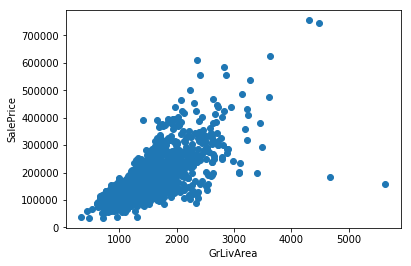

In [16]:
# Plot SalePrice vs GrLivArea
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [17]:
# Delete Outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

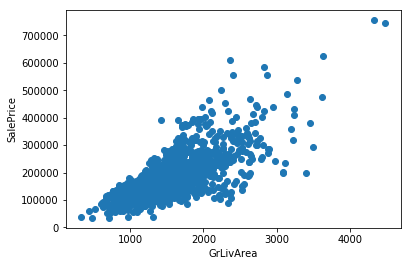

In [18]:
# Plot SalePrice vs GrLivArea
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [19]:
s1 = train.isnull().sum()[train.isnull().sum() != 0]
s2 = s1/train.shape[0]
pd.concat({'Missing Values': s1,
           'Missing Ratio': s2},axis=1).sort_values(by = 'Missing Ratio', ascending = False)

,Missing Ratio,Missing Values
PoolQC,0.995885,1452
MiscFeature,0.962963,1404
Alley,0.937586,1367
Fence,0.807270,1177
FireplaceQu,0.473251,690
LotFrontage,0.177641,259
GarageType,0.055556,81
GarageYrBlt,0.055556,81
GarageFinish,0.055556,81
GarageQual,0.055556,81


In [20]:
s1 = test.isnull().sum()[test.isnull().sum() != 0]
s2 = s1/test.shape[0]
pd.concat({'Missing Values': s1,
           'Missing Ratio': s2},axis=1).sort_values(by = 'Missing Ratio', ascending = False)

,Missing Ratio,Missing Values
PoolQC,0.997944,1456
MiscFeature,0.965045,1408
Alley,0.926662,1352
Fence,0.801234,1169
FireplaceQu,0.500343,730
LotFrontage,0.155586,227
GarageCond,0.053461,78
GarageYrBlt,0.053461,78
GarageQual,0.053461,78
GarageFinish,0.053461,78


In [21]:
data = pd.concat((train, test),ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [22]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [23]:
data.shape

(2917, 81)

In [24]:
# Missing Values imputation
# Replace NaN with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'GarageCars',
           'GarageArea', 'MasVnrArea', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [25]:
# Replace NaN with median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [26]:
# Replace with None
for col in ('PoolQC', 'Alley','Fence', 'FireplaceQu','GarageType','GarageFinish', 'GarageQual',
            'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'MSSubClass', 'MiscFeature','MasVnrType'):
    data[col] = data[col].fillna('None')

In [27]:
# Replace with mode
for col in ('Exterior1st', 'Exterior2nd', 'KitchenQual', 'Electrical', 'SaleType',
            'MSZoning', 'GarageYrBlt'):
    data[col] =  data[col].fillna(data[col].mode()[0])

In [28]:
# Replace with especific value
data["Functional"] = data["Functional"].fillna("Typ")

In [29]:
# Create total square feets feature
TotalSF = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
data.insert(loc=0,column="TotalSF", value=TotalSF)

In [30]:
data.isnull().sum()

TotalSF             0
1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2       80
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence               0
FireplaceQu         0
Fireplaces          0
Foundation          0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            0
MasVnrArea          0
MasVnrType          0
MiscFeature         0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

In [31]:
data = pd.get_dummies(data)

In [32]:
target_col = 'SalePrice'
exclude_cols = ['SalePrice', 'Id']
feature_cols = [col for col in data.columns if col not in exclude_cols]

In [33]:
feature_cols 

['TotalSF',
 '1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_None',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_None',
 'BsmtFinType1_Rec',

In [34]:
X_train = data[:train.shape[0]]

In [35]:
X_test = data[train.shape[0]:]

In [36]:
X_train.shape

(1458, 309)

In [37]:
X_test.shape

(1459, 309)

In [38]:
y_train = X_train['SalePrice']
X_train = X_train.drop(['Id','SalePrice'], axis=1)
X_test = X_test.drop(['Id','SalePrice'], axis=1)

In [39]:
X_train.shape

(1458, 307)

In [40]:
feature_cols = [col for col in X_train.columns]

In [41]:
feature_cols

['TotalSF',
 '1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_None',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_None',
 'BsmtFinType1_Rec',

In [42]:
X_train.shape

(1458, 307)

In [43]:
X_test.shape

(1459, 307)

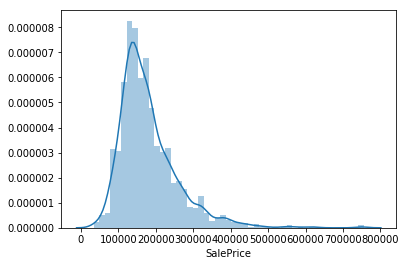

In [44]:
sns.distplot(y_train)
plt.show()

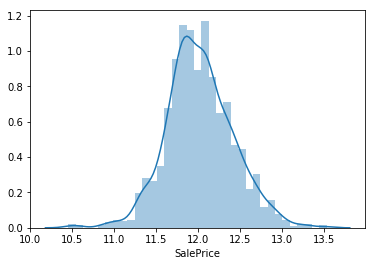

In [45]:
y_train=np.log(y_train)
sns.distplot(y_train)
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_features='auto', n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
ypred = rf.predict(X_test)

In [48]:
X_test.shape

(1459, 307)

In [49]:
X_train.shape

(1458, 307)

In [50]:
# ランダムフォレストによる特徴量の重要度の算出
def varImpPlot(clf, feature_names, topN = 10, verbose = True):
    feature_names = np.array(feature_names)
    feature_importance = clf.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    
    topN_feature = feature_importance[sorted_idx][len(feature_importance) - topN:]
    topN_feature_name = feature_names[sorted_idx][len(feature_importance) - topN:]
    pos = np.arange(topN) + .5
    plt.barh(pos, topN_feature, align='center')
    plt.yticks(pos, topN_feature_name)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
    rev_sorted_idx = np.argsort(feature_importance)[::-1]
    if verbose:
        for i, v in zip(feature_names[rev_sorted_idx], feature_importance[rev_sorted_idx]):
            print(i, v)

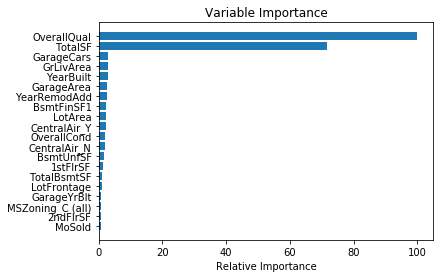

In [51]:
varImpPlot(rf, feature_cols, topN=20, verbose=False)

In [52]:
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_cols_ar = np.array(feature_cols)
new_feature_cols = feature_cols_ar[feature_importance > 0]

In [53]:
# ランダムフォレストによる特徴量の重要度の算出
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(50, 300))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

Training done using Random Forest


In [54]:
# use the top 30 features only
X_train = X_train.iloc[:,ranking[:50]]
X_test = X_test.iloc[:,ranking[:50]]

# interaction between the top 2
#X_train["Interaction"] = X_train["GrLivArea"]*X_train["OverallQual"]
#X_test["Interaction"] = X_test["GrLivArea"]*X_test["OverallQual"]

In [55]:
X_train.shape

(1458, 50)

In [56]:
X_train1, X_train2, y_train1, y_train2 = \
 train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

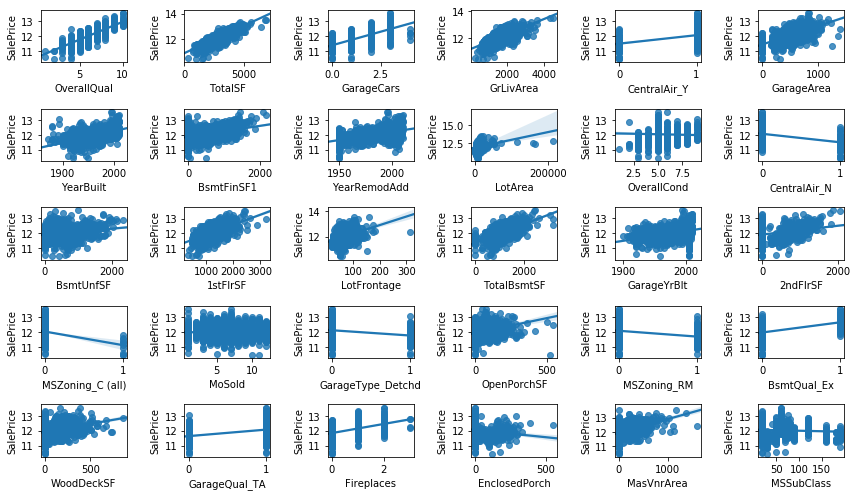

In [57]:
# relation to the target
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [58]:
# outlier deletion
#Xmat = X_train
#Xmat['SalePrice'] = y_train
#Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>5) & (Xmat['SalePrice']<13)].index)

# recover
#y_train = Xmat['SalePrice']
#X_train = Xmat.drop(['SalePrice'], axis=1)

In [59]:
X_train.shape

(1458, 50)

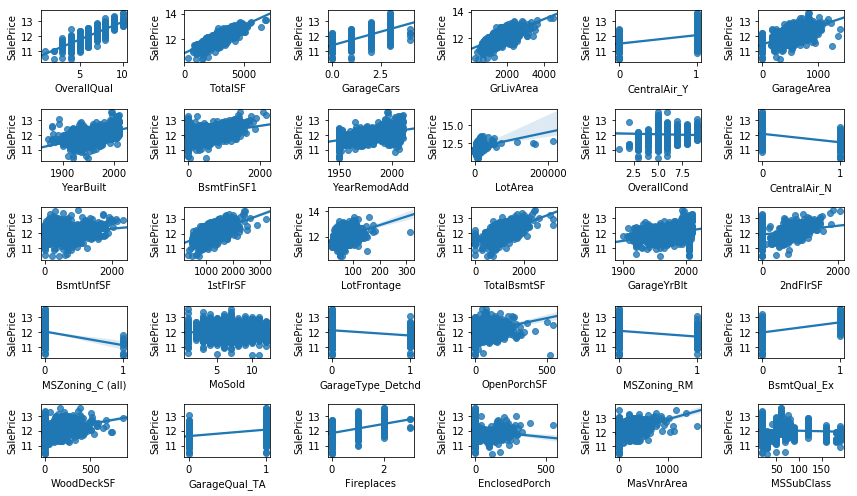

In [60]:
# relation to the target
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [61]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_features='auto',max_depth=None)
rf.fit(X_train1, y_train1)
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X_train1, y_train1,cv=6).mean()


0.8825564724889352

In [62]:
from sklearn.metrics import mean_squared_error
rf.fit(X_train1, y_train1)
y_pred2=rf.predict(X_train2)
rf_mse=mean_squared_error(y_train2,y_pred2)
rf_mse

0.01851488252214318

In [63]:
from sklearn.metrics import r2_score
r2_score(y_train2, y_pred2)

0.8715028796429518

In [64]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X_train, y_train,cv=6).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8645644507082272

In [65]:
RandomForestRegressor(random_state=0)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
from sklearn.metrics import mean_squared_error
rf.fit(X_train1, y_train1)
y_pred2=rf.predict(X_train2)
rf_mse=mean_squared_error(y_train2,y_pred2)
rf_mse

0.020733387608465024

In [68]:
#グリッドサーチによるハイパーパラメータ選定
from sklearn.model_selection import GridSearchCV
params={'max_depth':[2,10,50,100,None],'n_estimators':[250,500,1000]}

gscv=GridSearchCV(estimator=rf,param_grid=params,verbose=1, cv=5,scoring='neg_mean_squared_error' ) 
gscv=gscv.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.3min finished


In [69]:
gscv.best_params_

{'max_depth': 50, 'n_estimators': 1000}

In [70]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=50,max_features='auto')
rf.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X_train, y_train,cv=6).mean()

0.8840937715508742

In [71]:
gscv

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 10, 50, 100, None], 'n_estimators': [250, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [72]:
gscv.best_params_

{'max_depth': 50, 'n_estimators': 1000}

In [73]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
# XGBoost
from xgboost.xgbclassifier import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(reg_svr, X_train, y_train,cv=6).mean()

In [ ]:
# second-feature modeling using linear regression
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train)

# prediction using the test set
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
     'DL': reg_dl.predict(X_test).ravel(),
     'SVR': reg_svr.predict(X_test),
    })

# Don't forget to convert the prediction back to non-log scale
y_pred = np.exp(reg.predict(X_test2))



In [75]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
params = {'n_estimators' :[100, 200, 300], 'learning_rate':[0.01, 0.1, 1]}
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1)
gcv = GridSearchCV(ada, param_grid=params, n_jobs=4, scoring='minsc')

NameError: name 'AdaBoostClassifier' is not defined

In [76]:
rf.fit(X_train, y_train)
y_pred=np.exp(rf.predict(X_test))

In [77]:
# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})
submission.to_csv('houseprice2.csv', index=False)